##import dependency

In [1]:
!pip install mlxtend

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing as perprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.decomposition import PCA

## Step 1: Load the dataset

###Read the csv file

In [4]:
#import the data
data = pd.read_csv("/content/Crop_recommendation.csv")

In [5]:
data.head()

,temperature,humidity,ph,water availability,season,label
0,20.879744,82.002744,6.502985,202.935536,rainy,rice
1,21.770462,80.319644,7.038096,226.655537,rainy,rice
2,23.004459,82.320763,7.840207,263.964248,rainy,rice
3,26.491096,80.158363,6.980401,242.864034,rainy,rice
4,20.130175,81.604873,7.628473,262.717340,rainy,rice


## Step 2: Preprocess the dataset

In [6]:
#show the datatype of each feature
data.dtypes

temperature           float64
humidity              float64
ph                    float64
water availability    float64
season                 object
label                  object
dtype: object

In [7]:
data.isnull().sum()

temperature           0
humidity              0
ph                    0
water availability    0
season                0
label                 0
dtype: int64

#### Handling Categorical Variables with Label Encoding (one-hot encoding)

In [8]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
label_mappings = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'label':  # Skip the target column
        data[column] = label_encoder.fit_transform(data[column])
        label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Encode the target column
data['label'] = label_encoder.fit_transform(data['label'])
label_mappings['label'] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [9]:
# Separate features and target
X = data.drop(['label'], axis=1,inplace=False)
Y = data['label'].astype(int)

In [10]:
data

,temperature,humidity,ph,water availability,season,label
0,20.879744,82.002744,6.502985,202.935536,0,11
1,21.770462,80.319644,7.038096,226.655537,0,11
2,23.004459,82.320763,7.840207,263.964248,0,11
3,26.491096,80.158363,6.980401,242.864034,0,11
4,20.130175,81.604873,7.628473,262.717340,0,11
...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,0,3
1396,23.928879,88.071123,6.880205,154.660874,0,3
1397,24.814412,81.686889,6.861069,190.788639,0,3
1398,24.447439,82.286484,6.769346,190.968489,0,3


## Step3: Split the dataset

In [11]:
# Split the dataset into training and testing sets (80:20)
X,X_test,Y,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (1120, 5)
Shape of Y_train : (1120,)
Shape of X_test : (280, 5)
Shape of Y_test : (280,)


In [13]:
X

,temperature,humidity,ph,water availability,season
1121,29.052480,93.922178,6.105910,23.666206,2
48,21.666283,80.709606,7.062779,210.814209,0
155,19.849394,61.245001,5.730617,100.768925,0
306,19.883940,20.315641,5.789214,60.919748,1
1287,24.688548,78.512070,7.839849,69.311536,3
...,...,...,...,...,...
1095,25.287846,89.636679,6.765095,58.286977,2
1130,29.727911,94.297533,6.367801,26.523641,2
1294,23.438217,78.633888,6.200672,81.150721,3
860,23.970814,62.355576,7.007038,53.409060,0


In [14]:
Y

1121     9
48      11
155      6
306      4
1287     2
        ..
1095    12
1130     9
1294     2
860      5
1126     9
Name: label, Length: 1120, dtype: int64

## Step 4: Train the SVC model

After splitting the dataset, we will use the SVM model now and train it with the data

In [15]:
modelSVM = SVC()
modelSVM.fit(X, Y)

SVC()

In [16]:
y_predict = modelSVM.predict(X)

In [17]:
# Create target names from label mappings
target_names = [label for label in label_mappings['label']]

In [18]:
print('SVM preformance:' , classification_report(Y , y_predict,target_names=target_names))

SVM preformance:               precision    recall  f1-score   support

   blackgram       0.80      0.96      0.87        78
    chickpea       0.72      1.00      0.84        78
      cotton       0.99      0.86      0.92        86
        jute       0.78      1.00      0.88        82
 kidneybeans       0.93      0.62      0.75        80
      lentil       0.85      1.00      0.92        77
       maize       0.90      0.96      0.93       161
   mothbeans       1.00      0.64      0.78        78
    mungbean       1.00      0.18      0.30        79
   muskmelon       1.00      1.00      1.00        80
  pigeonpeas       1.00      0.78      0.87        80
        rice       1.00      0.78      0.88        81
  watermelon       0.53      1.00      0.69        80

    accuracy                           0.84      1120
   macro avg       0.88      0.83      0.82      1120
weighted avg       0.89      0.84      0.83      1120



## Step 5: Use grid search

Use grid search to find the best hyperparameters for the SVM model.

In [19]:
#Create a list of hyperparameters dictionary
parameters =  [ {'kernel': ['linear','rbf'], 'C': [0.01 , 0.1 , 1 ,10 ,100 , 1000],'gamma' : [1 , 0.1 , 0.01 , 0.001 ]} ]

In [20]:
#calculate the grid
gridSearch = GridSearchCV(modelSVM ,parameters , refit=True , verbose=3 )

In [21]:
#fit the model for grid search
gridSearch.fit(X , Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   0.1s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   0.1s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   0.1s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.973 total time=   0.1s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   0.1s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.143 total time=   0.6s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.147 total time=   0.5s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.143 total time=   0.4s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.143 total time=   0.5s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.143 total time=   0.5s
[CV 1/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.960 total time=   0.1s
[CV 2/5] END ..C=0.01, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['linear', 'rbf']}],
             verbose=3)

Now that we used gridSearch, we will print the best parameter after the tuning

In [22]:
#print best hyperparameter after tuning
# Best parameters
best_params = gridSearch.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [23]:
# Train the best SVM model
svm_best = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
svm_best.fit(X, Y)

SVC(C=0.1, gamma=1, kernel='linear')

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


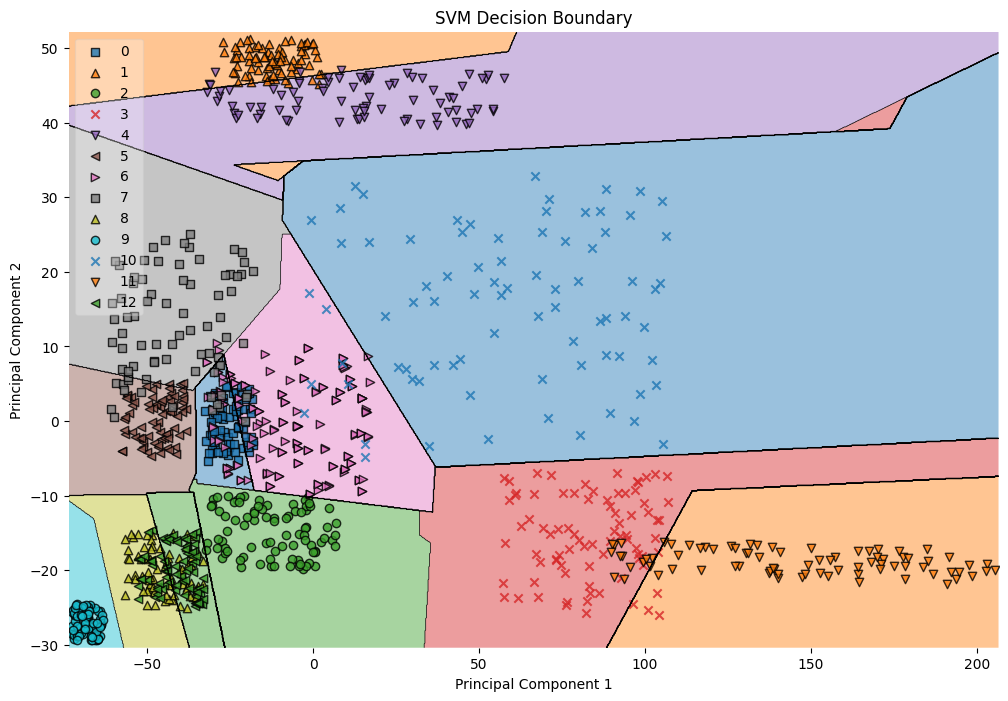

In [24]:
# Get the best estimator
svm_best = gridSearch.best_estimator_

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X)
X_test_2D = pca.transform(X_test)

# Train SVM with best parameters on 2D data
svm_best_2D = SVC(C=svm_best.C, gamma=svm_best.gamma, kernel=svm_best.kernel)
svm_best_2D.fit(X_train_2D, Y)

# Plotting the decision boundary
plt.figure(figsize=(12, 8))
plot_decision_regions(X_train_2D, Y.values, clf=svm_best_2D, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.show()

## Step 6: Test the performance

In [30]:
# Predict on the train set
y_pred = svm_best.predict(X)

# Evaluate the model
print("Accuracy:", accuracy_score(Y, y_pred))
print("Classification Report:")
print(classification_report(Y, y_pred,target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(Y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9803571428571428
Classification Report:
              precision    recall  f1-score   support

   blackgram       0.96      0.99      0.97        78
    chickpea       1.00      1.00      1.00        78
      cotton       1.00      1.00      1.00        86
        jute       0.87      0.98      0.92        82
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        77
       maize       0.98      0.99      0.98       161
   mothbeans       0.99      0.95      0.97        78
    mungbean       1.00      1.00      1.00        79
   muskmelon       1.00      1.00      1.00        80
  pigeonpeas       1.00      0.97      0.99        80
        rice       0.97      0.85      0.91        81
  watermelon       1.00      1.00      1.00        80

    accuracy                           0.98      1120
   macro avg       0.98      0.98      0.98      1120
weighted avg       0.98      0.98      0.98      1120

Confusion Matrix:
[[ 77   0

In [38]:
# Predict on the test set
y_pred = svm_best.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred,target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9714285714285714
Classification Report:
              precision    recall  f1-score   support

   blackgram       0.91      0.95      0.93        22
    chickpea       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        14
        jute       0.86      1.00      0.92        18
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.97        39
   mothbeans       1.00      0.91      0.95        22
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        20
  pigeonpeas       1.00      0.85      0.92        20
        rice       1.00      0.89      0.94        19
  watermelon       1.00      1.00      1.00        20

    accuracy                           0.97       280
   macro avg       0.97      0.97      0.97       280
weighted avg       0.97      0.97      0.97       280

Confusion Matrix:
[[21  0  

Confusion Matrix:


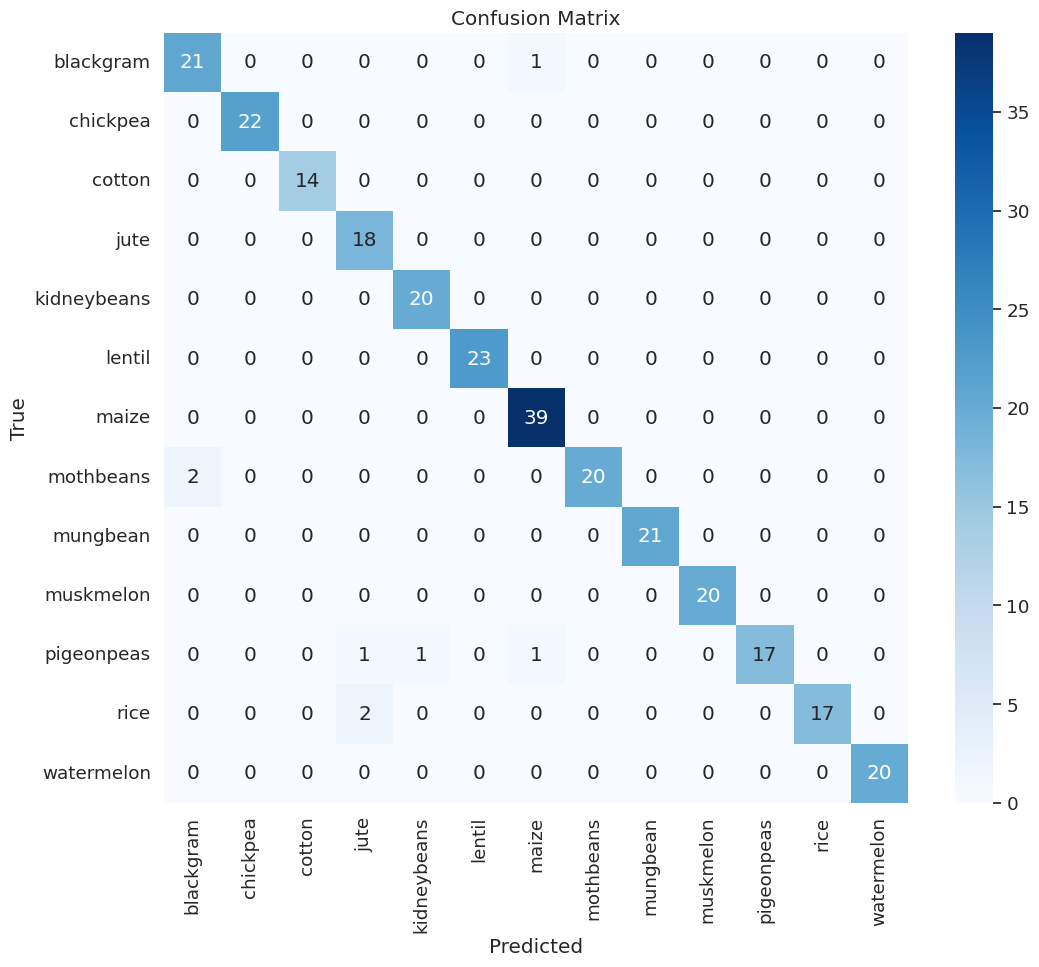

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")

# Plot the confusion matrix with colors
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',xticklabels=target_names, yticklabels=target_names)  # You can adjust the colormap here
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()